In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
import keras 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation


Using Theano backend.


# Keras

## Deep Learning library for Theano and TensorFlow

Keras is a minimalist, highly modular neural networks library, written in Python and capable of running on top of either TensorFlow or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
ref: https://keras.io/

## Why this name, Keras?

Keras (κέρας) means _horn_ in Greek. It is a reference to a literary image from ancient Greek and Latin literature, first found in the _Odyssey_, where dream spirits (_Oneiroi_, singular _Oneiros_) are divided between those who deceive men with false visions, who arrive to Earth through a gate of ivory, and those who announce a future that will come to pass, who arrive through a gate of horn. It's a play on the words κέρας (horn) / κραίνω (fulfill), and ἐλέφας (ivory) / ἐλεφαίρομαι (deceive).

Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System).

>_"Oneiroi are beyond our unravelling --who can be sure what tale they tell? Not all that men look for comes to pass. Two gates there are that give passage to fleeting Oneiroi; one is made of horn, one of ivory. The Oneiroi that pass through sawn ivory are deceitful, bearing a message that will not be fulfilled; those that come out through polished horn have truth behind them, to be accomplished for men who see them."_ Homer, Odyssey 19. 562 ff (Shewring translation).

## Hands On - Keras Logistic Regression
#### MNIST dataset

In [2]:
from sklearn.datasets import load_digits
digits_mnist = load_digits(2)

# from keras.datasets import mnist
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

X,y = digits_mnist.data, digits_mnist.target

print ("y [shape - %s]:"%(str(y.shape)),y[:10])

print ("X [shape - %s]:"%(str(X.shape)))
print (X[:3])
print (y[:10])

('y [shape - (360,)]:', array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1]))
X [shape - (360, 64)]:
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]
 [  0.   0.   1.   9.  15.  11.   0.   0.   0.   0.  11.  16.   8.  14.
    6.   0.   0.   2.  16.  10.   0.   9.   9.   0.   0.   1.  16.   4.
    0.   8.   8.   0.   0.   4.  16.   4.   0.   8.   8.   0.   0.   1.
   16.   5.   1.  11.   3.   0.   0.

In [3]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [4]:
X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

array([[  0.,   0.,   2., ...,   9.,   1.,   0.],
       [  0.,   0.,   7., ...,   3.,   0.,   0.],
       [  0.,   0.,   4., ...,  11.,   0.,   0.],
       ..., 
       [  0.,   0.,  11., ...,  15.,   0.,   0.],
       [  0.,   0.,   6., ...,   0.,   0.,   0.],
       [  0.,   0.,   4., ...,   0.,   0.,   0.]])

In [5]:
dims = X.shape[1]

def build_logistic_regression(dims):
    print(dims, 'dims')
    print("Building model...")
    model = Sequential()
    model.add(Dense(1, input_shape=(dims,), init='zero'))
    model.add(Activation('sigmoid'))
    model.compile(optimizer='sgd', loss='binary_crossentropy')
    return model
model = build_logistic_regression(dims)

(64, 'dims')
Building model...


In [6]:
model.get_weights()

[array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]], dtype=float32), array([ 0.], dtype=floa

## Model building

The `Sequential` model is a linear stack of layers.
You can also simply add layers via the `.add()` method:

```python
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
```

Before training a model, you need to configure the learning process, which is done via the `compile` method.

```
# for a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
```

## Training loop

* You can now train tour neural network by sampling minibatches from dataset and updating weights with chosen optimizer
* A size of minibatch (batch_size) is how many samples are used to compute stochastic gradient on each iteration.
    * (rule of thumb) more batch_size = slower, but more stable training
* The training time is usually measured in epochs: one epoch is a single full pass over training set.
    * If you have 200000 samples and batch_size=500, than 1 epoch = 200000/500 = 400 minibatch iterations
* You can interrupt and re-run training procedure as many times as you want. 
    * The training progress will be kept between `model.fit` calls until you recreate the whole model.
    * Sometimes model can "freeze" if you interrupt training half-way through execution


In [7]:
from sklearn.metrics import roc_auc_score
print ("train AUC:", roc_auc_score(y_train, model.predict(X_train)))
model.fit(X_train, y_train, batch_size=128, nb_epoch=5)

('train AUC:', 0.5)
Epoch 1/5
270/270 [==============================] - 0s - loss: 0.5236     
Epoch 2/5
270/270 [==============================] - 0s - loss: 0.2203     
Epoch 3/5
270/270 [==============================] - 0s - loss: 0.0189     
Epoch 4/5
270/270 [==============================] - 0s - loss: 0.0169     
Epoch 5/5
270/270 [==============================] - 0s - loss: 0.0147     


In [8]:
print ("train AUC:", roc_auc_score(y_train, model.predict(X_train)))
print ("val AUC:", roc_auc_score(y_test, model.predict(X_test)))

('train AUC:', 1.0)
('val AUC:', 1.0)


# Evaluation

In [9]:
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve

def display_results(model,X,y):
    
    val_proba = model.predict_proba(X,verbose=0)
    
    print ("Area under ROC = %.5f"%roc_auc_score(y,val_proba[:,-1]))
    print ("Accuracy @0.5  = %.5f"%accuracy_score(y,val_proba[:,-1]>0.5))
    
    plt.plot(*roc_curve(y,val_proba[:,-1])[:2], lw=3)
    plt.xlabel("1 - background rejection")
    plt.ylabel("Signal efficiency")
    plt.grid()


Training metrics
Area under ROC = 1.00000
Accuracy @0.5  = 1.00000


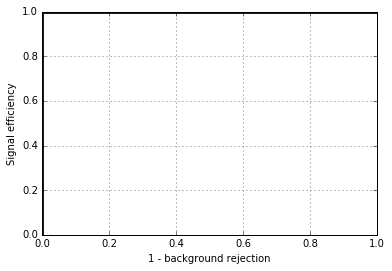

In [10]:
print ("Training metrics")
display_results(model,X_train,y_train)

Validation metrics
Area under ROC = 1.00000
Accuracy @0.5  = 1.00000


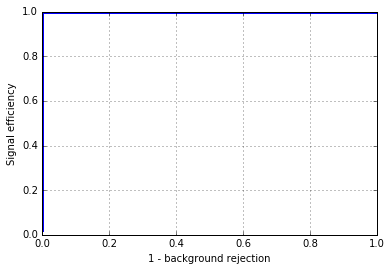

In [11]:
print ("Validation metrics")
display_results(model,X_test,y_test)

## Examining & Saving

- `model.summary()`: prints a summary representation of your model.
- `model.get_config()`: returns a dictionary containing the configuration of the model.

- `model.get_weights()`: returns a list of all weight tensors in the model, as Numpy arrays.
- `model.set_weights(weights)`: sets the values of the weights of the model, from a list of Numpy arrays. The arrays in the list should have the same shape as those returned by `get_weights()`.
- `model.to_json()`: returns a representation of the model as a JSON string. 
- `model.save_weights(filepath)`: saves the weights of the model as a HDF5 file.
- `model.load_weights(filepath, by_name=False)`: loads the weights of the model from a HDF5 file

In [12]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 1)             65          dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 1)             0           dense_1[0][0]                    
Total params: 65
____________________________________________________________________________________________________


In [13]:
model.get_weights()

[array([[  0.00000000e+00],
        [ -1.31502602e-04],
        [ -7.54185952e-03],
        [ -3.19138020e-02],
        [ -8.25646427e-03],
        [  3.41809727e-02],
        [  1.33068748e-02],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [ -4.64706495e-03],
        [ -4.95798327e-02],
        [ -1.84192311e-03],
        [  1.51339276e-02],
        [ -1.04541266e-02],
        [  1.00164004e-02],
        [  0.00000000e+00],
        [  5.89268981e-04],
        [ -1.11647630e-02],
        [ -3.52957882e-02],
        [  7.00600892e-02],
        [  7.88193867e-02],
        [ -2.85383984e-02],
        [ -1.73785016e-02],
        [  0.00000000e+00],
        [  2.94634490e-04],
        [ -1.54800825e-02],
        [ -1.47648035e-02],
        [  8.72897357e-02],
        [  9.84108672e-02],
        [ -1.69817470e-02],
        [ -3.97809744e-02],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [ -2.80812364e-02],
        [ -3.53203453e-02],
        [  6.7875921

## Callbacks

A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. You can pass a list of callbacks (as the keyword argument 

In [14]:
class AucHistory(keras.callbacks.Callback):
    def __init__(self, X_train=None, y_train=None):
        self.X_train = X_train
        self.y_train = y_train
        
    def on_train_begin(self, logs={}):
        self.aucs = []
        self.train_aucs = []
        self.losses = []
 
    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        if self.model.validation_data is not None:
            y_pred = self.model.predict(self.model.validation_data[0])
            self.aucs.append(roc_auc_score(self.model.validation_data[1], y_pred))
        if self.X_train is not None:
            y_pred = self.model.predict(self.X_train)
            self.train_aucs.append(roc_auc_score(self.y_train, y_pred))
        return

In [15]:
auc_history = AucHistory()
model = build_logistic_regression(dims)
model.reset_states()
model.fit(X_train, y_train, nb_epoch=5, callbacks=[auc_history], 
          validation_data=(X_test, y_test), batch_size=500)

(64, 'dims')
Building model...
Train on 270 samples, validate on 90 samples
Epoch 1/5
270/270 [==============================] - 0s - loss: 0.6931 - val_loss: 0.1336
Epoch 2/5
270/270 [==============================] - 0s - loss: 0.1236 - val_loss: 0.1072
Epoch 3/5
270/270 [==============================] - 0s - loss: 0.0937 - val_loss: 0.0785
Epoch 4/5
270/270 [==============================] - 0s - loss: 0.0757 - val_loss: 0.0699
Epoch 5/5
270/270 [==============================] - 0s - loss: 0.0628 - val_loss: 0.0568


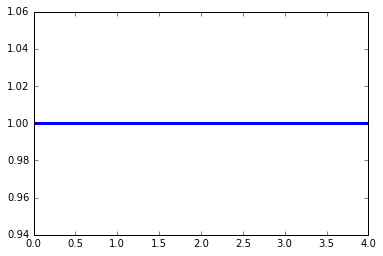

In [16]:
_ = plt.plot(auc_history.aucs, lw=3)

## Playground

- https://transcranial.github.io/keras-js/
- http://playground.tensorflow.org/